<a href="https://colab.research.google.com/github/SARTHAK1621/BitcoinHeistRansomwareAddressDetection/blob/master/bitcoinransomwaredetectionRandimForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import pandas as pd

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
link = 'https://drive.google.com/file/d/13F_-DeML6Lu9lFhOc5gkoutxdafiE03J/view?usp=sharing' # The shareable link
id = "13F_-DeML6Lu9lFhOc5gkoutxdafiE03J"
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('BitcoinHeistData.csv')  
data_df = pd.read_csv('BitcoinHeistData.csv')
print(data_df.shape)
# Dataset is now stored in a Pandas Dataframe

13F_-DeML6Lu9lFhOc5gkoutxdafiE03J
(2916697, 10)


In [5]:
len(data_df['label'].unique())

29

In [6]:
data_df.shape

(2916697, 10)

In [7]:
data_df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [8]:
data_df.corr()

,year,day,length,weight,count,looped,neighbors,income
year,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535
day,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628
length,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488
weight,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774
count,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635
looped,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551
neighbors,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966
income,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000


In [9]:
data_df['label'].unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [10]:
ransomware_list = ['princetonCerber','princetonLocky','montrealCryptoLocker',
                    'montrealCryptXXX','montrealWannaCry','montrealDMALockerv3', 'montrealCryptoTorLocker2015',
                    'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt','montrealDMALocker', 'montrealGlobe',
                    'montrealEDA2','montrealVenusLocker', 'montrealXTPLocker','montrealGlobev3', 'montrealJigSaw',
                    'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy','montrealCryptConsole', 'montrealGlobeImposter',
                    'montrealSam','montrealComradeCircle', 'montrealAPT',
                   'paduaCryptoWall','paduaKeRanger','paduaJigsaw']
data_df.replace(ransomware_list,'ransomeware',inplace = True)

In [11]:
data_df.replace('ransomeware',1,inplace = True)
data_df.replace('white',2,inplace = True)
data_df

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,1
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,1
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,1
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,1
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,1
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,2
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,2
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,2
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,2


In [12]:
label_encoder = preprocessing.LabelEncoder()
data_df['address']=label_encoder.fit_transform(data_df['address'])
data_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,23,2017,11,18,0.008333,1,0,2,100050000.0,1
1,128,2016,132,44,0.000244,1,0,1,100000000.0,1
2,169,2016,246,0,1.000000,1,0,2,200000000.0,1
3,217,2016,322,72,0.003906,1,0,2,71200000.0,1
4,293,2016,238,144,0.072848,456,0,1,200000000.0,1


In [13]:
data_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,23,2017,11,18,0.008333,1,0,2,100050000.0,1
1,128,2016,132,44,0.000244,1,0,1,100000000.0,1
2,169,2016,246,0,1.000000,1,0,2,200000000.0,1
3,217,2016,322,72,0.003906,1,0,2,71200000.0,1
4,293,2016,238,144,0.072848,456,0,1,200000000.0,1


In [14]:
data_df.corr()

,address,year,day,length,weight,count,looped,neighbors,income,label
address,1.000000,0.185803,0.017566,0.000723,0.009506,0.044201,0.008970,0.008869,-0.001169,0.016943
year,0.185803,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535,-0.021367
day,0.017566,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628,0.008097
length,0.000723,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488,0.006860
weight,0.009506,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774,-0.002676
count,0.044201,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635,0.008654
looped,0.008970,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551,0.017810
neighbors,0.008869,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966,0.000872
income,-0.001169,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000,0.002716
label,0.016943,-0.021367,0.008097,0.006860,-0.002676,0.008654,0.017810,0.000872,0.002716,1.000000


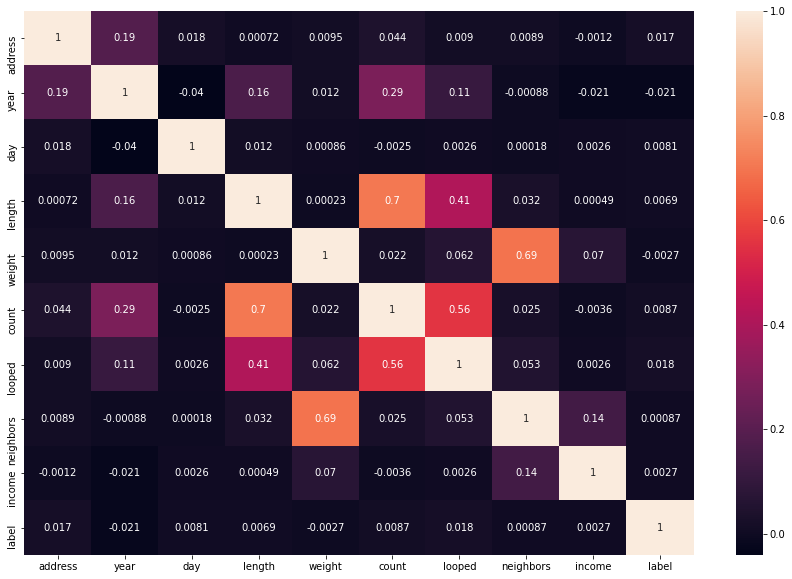

In [15]:
matrix = np.triu(data_df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(data_df.corr(), annot=True)

In [16]:
minmax =MinMaxScaler()
data_minmax_df = minmax.fit_transform(data_df)

In [17]:
df_minmax = pd.DataFrame(data_df,columns =['year','day','length','weight','count','looped','neighbors','income','label'])
df_minmax

,year,day,length,weight,count,looped,neighbors,income,label
0,2017,11,18,0.008333,1,0,2,1.000500e+08,1
1,2016,132,44,0.000244,1,0,1,1.000000e+08,1
2,2016,246,0,1.000000,1,0,2,2.000000e+08,1
3,2016,322,72,0.003906,1,0,2,7.120000e+07,1
4,2016,238,144,0.072848,456,0,1,2.000000e+08,1
...,...,...,...,...,...,...,...,...,...
2916692,2018,330,0,0.111111,1,0,1,1.255809e+09,2
2916693,2018,330,0,1.000000,1,0,1,4.409699e+07,2
2916694,2018,330,2,12.000000,6,6,35,2.398267e+09,2
2916695,2018,330,0,0.500000,1,0,1,1.780427e+08,2


In [18]:
df_minmax.describe()

,year,day,length,weight,count,looped,neighbors,income,label
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09,1.985801e+00
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11,1.183089e-01
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07,1.000000e+00
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07,2.000000e+00
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08,2.000000e+00
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08,2.000000e+00
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13,2.000000e+00


In [19]:
df_zscore=pd.DataFrame(stats.zscore(df_minmax))

In [20]:
df_zscore

,0,1,2,3,4,5,6,7,8
0,1.118540,-1.638825,-0.457910,-0.146203,-0.426499,-0.246819,-0.011525,-0.026830,-8.332437
1,0.675552,-0.475496,-0.017100,-0.148404,-0.426499,-0.246819,-0.067333,-0.026830,-8.332437
2,0.675552,0.620533,-0.763086,0.123693,-0.426499,-0.246819,-0.011525,-0.026215,-8.332437
3,0.675552,1.351219,0.457618,-0.147408,-0.426499,-0.246819,-0.011525,-0.027007,-8.332437
4,0.675552,0.543619,1.678322,-0.128644,-0.157216,-0.246819,-0.067333,-0.026215,-8.332437
...,...,...,...,...,...,...,...,...,...
2916692,1.561528,1.428134,-0.763086,-0.118230,-0.426499,-0.246819,-0.067333,-0.019726,0.120013
2916693,1.561528,1.428134,-0.763086,0.123693,-0.426499,-0.246819,-0.067333,-0.027174,0.120013
2916694,1.561528,1.428134,-0.729177,3.117498,-0.423540,-0.240610,1.830120,-0.012703,0.120013
2916695,1.561528,1.428134,-0.763086,-0.012389,-0.426499,-0.246819,-0.067333,-0.026350,0.120013


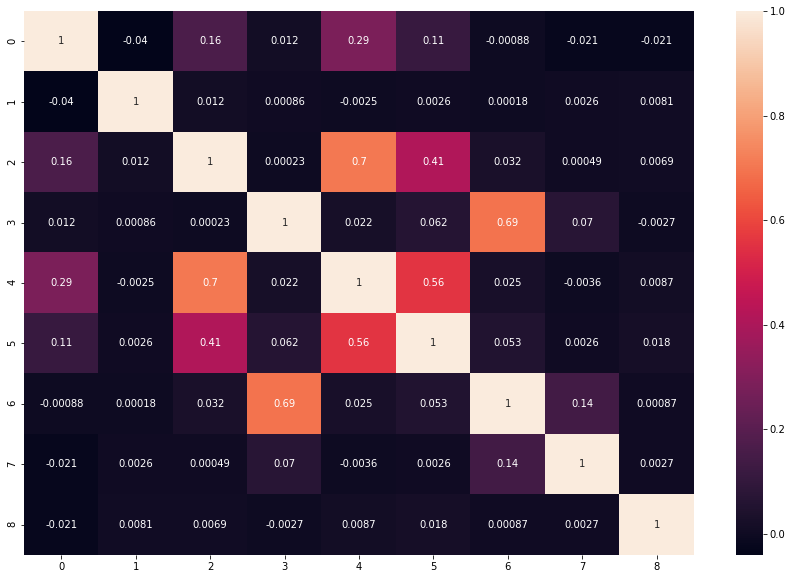

In [21]:
matrix = np.triu(df_zscore.corr())
plt.figure(figsize = (15,10))
sns.heatmap(df_zscore.corr(), annot=True)

In [22]:
X = np.array(data_df.drop(['label'],1))
y = np.array(data_df['label'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X=data_df.drop('label',axis=1)
y=data_df['label']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(max_depth=3,random_state=2)
rf=rf.fit(X_train,y_train)
rf.score(X_test,y_test)